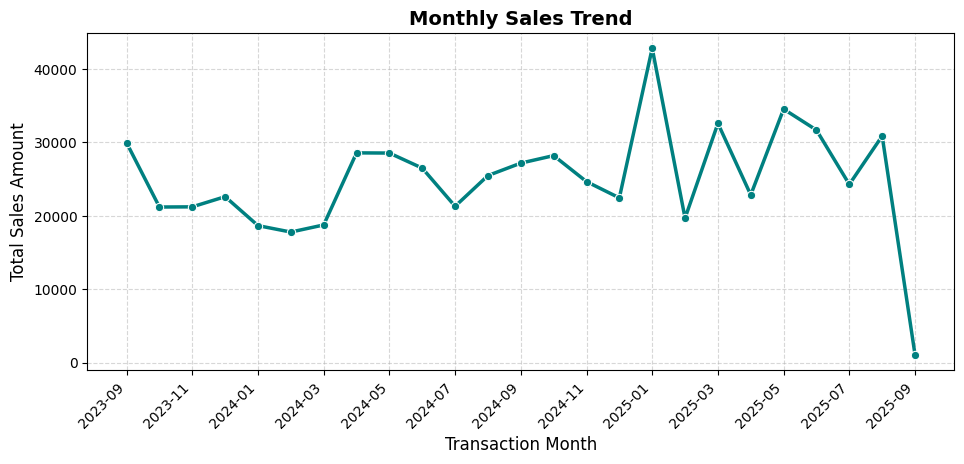

In [0]:
# Databricks notebook source
# MAGIC %md
# # 🛒 Customer 360° Analytics for E-commerce
# 
# **Objective:** Build an end-to-end ETL + Analytics pipeline using pandas and seaborn.  
# 
# **Datasets Used:**
# - customers.csv  
# - products.csv  
# - transactions.csv  
# - reviews.csv  
# - support.csv
# 
# This notebook covers:
# 1️⃣ Descriptive Analytics  
# 2️⃣ Diagnostic Analytics  
# 3️⃣ Predictive Analytics  
# 4️⃣ Prescriptive Analytics  
# 5️⃣ Advanced AI/ML  
# 6️⃣ 360° Customer View
# 
# ---

# COMMAND ----------

# MAGIC %md
# ## Step 1. Setup and Load Data

# COMMAND ----------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load datasets (update paths according to your environment)
customers = pd.read_csv("/Workspace/Users/rashmi.dillyappa@gmail.com/customers.csv")
products = pd.read_csv("/Workspace/Users/rashmi.dillyappa@gmail.com/products (1).csv")
transactions = pd.read_csv("/Workspace/Users/rashmi.dillyappa@gmail.com/transactions.csv")
reviews = pd.read_csv("/Workspace/Users/rashmi.dillyappa@gmail.com/reviews.csv")
support = pd.read_csv("/Workspace/Users/rashmi.dillyappa@gmail.com/support.csv")


display(customers.head())
display(products.head())
display(transactions.head())

# Standardize columns--convert all column name to lower case  
#remove any leading and trailing   spaces  
for df in [customers, products, transactions, reviews, support]:
    df.columns = df.columns.str.lower().str.strip()
# Handle nulls
customers.fillna("Unknown", inplace=True)
transactions['total_amount'] = transactions['total_amount'].fillna(0)
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

# Merge all
df = (transactions
      .merge(customers, on='customer_id', how='left')
      .merge(products, on='product_id', how='left'))

      #display(df.head())

# Customer distribution -Top 10

plt.figure(figsize=(10,5))

# check if location column exists, else take another column
x_col = 'location' if 'location' in customers.columns else customers.columns[1]

# take top 10 most common locations
top_locations = customers[x_col].value_counts().nlargest(10)

sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")
plt.title("Top 10 Customer Locations")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Acquisition channels
# Set larger figure size
plt.figure(figsize=(8, 5))

# Sort channels by frequency
sns.countplot(
    data=customers, 
    x='acquisition_channel', 
    order=customers['acquisition_channel'].value_counts().index,
    palette='coolwarm'
)

# Add labels
plt.title("Customer Acquisition Channels", fontsize=14, fontweight='bold')
plt.xlabel("Acquisition Channel", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=30, ha='right')

# Show values on top of bars
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width()/2, 
        p.get_height() + 1, 
        int(p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

# Sales trend
plt.figure(figsize=(10, 5))  # Increase figure width

# Line plot
sns.lineplot(x='purchase_date', y='total_amount', data=sales_trend, marker='o', linewidth=2.5, color='teal')

# Title & labels
plt.title("Monthly Sales Trend", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Month", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)

# Rotate x-axis labels & limit tick frequency
plt.xticks(rotation=45, ha='right')

# Show every 3rd month (adjust step size based on data length)
plt.xticks(ticks=range(0, len(sales_trend), max(1, len(sales_trend)//10)), 
           labels=sales_trend['purchase_date'][::max(1, len(sales_trend)//10)])

# Add light grid and borders
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(pad=2.0)  # Adds some padding (border)
plt.show()



